In [171]:
#importing files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#importing datasets
dataset=pd.read_csv(r"C:\Users\KIIT\Desktop\Gender-Voice-Recognition_Machine-Learning-master\voiceDataSet.csv")

In [173]:
dataset.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [174]:
dataset['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

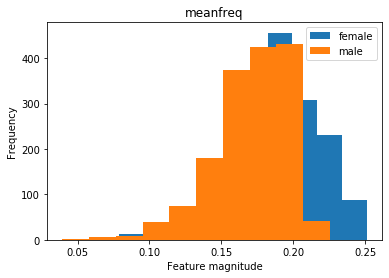

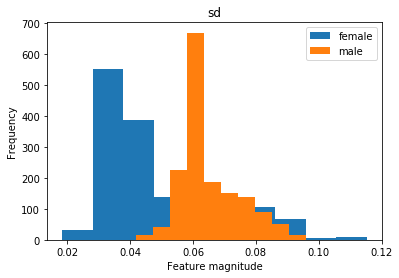

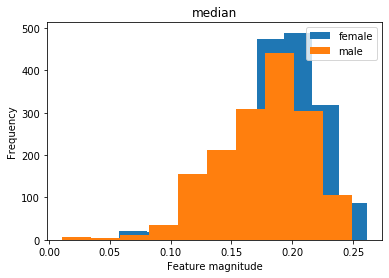

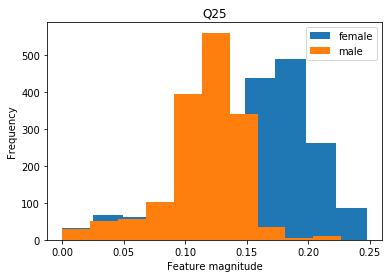

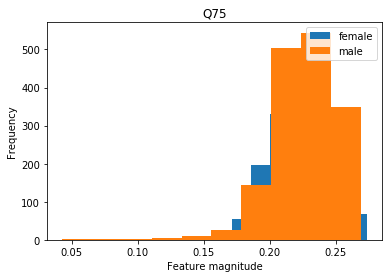

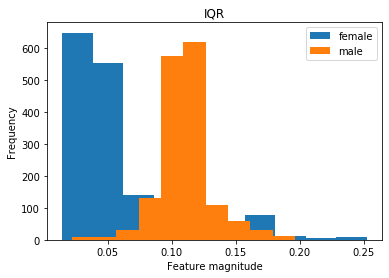

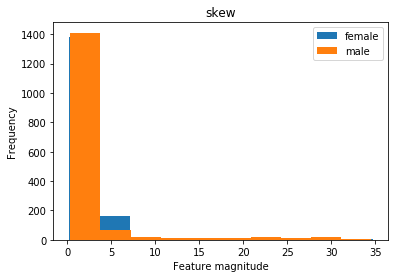

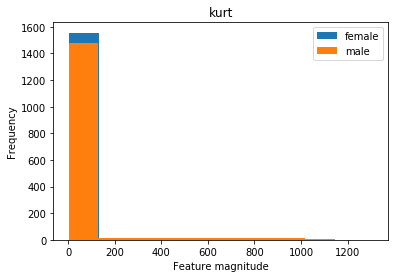

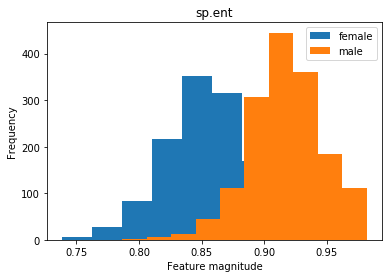

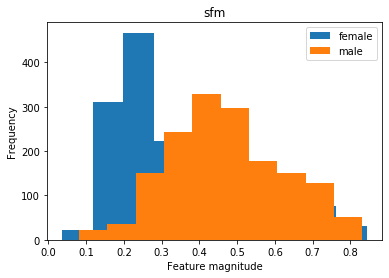

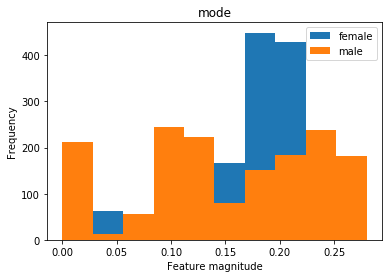

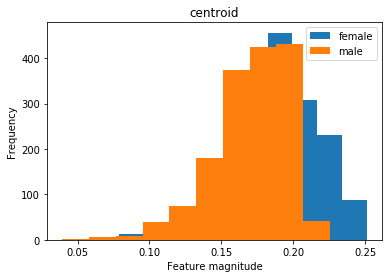

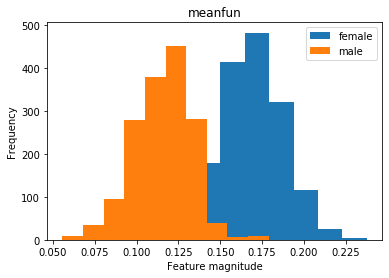

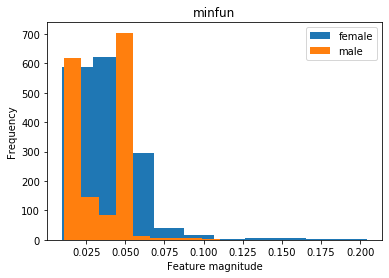

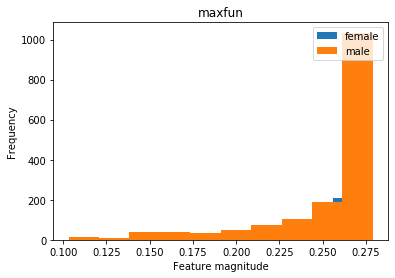

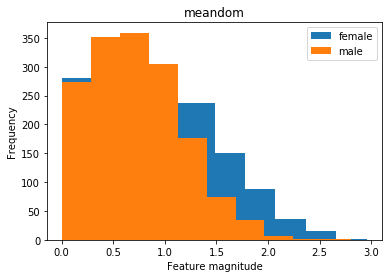

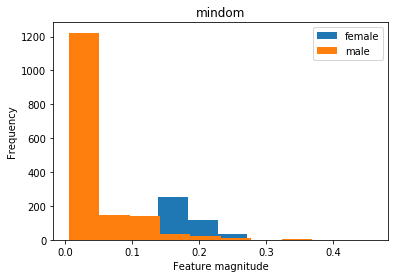

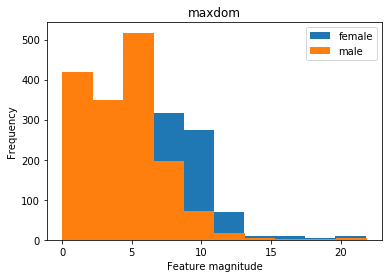

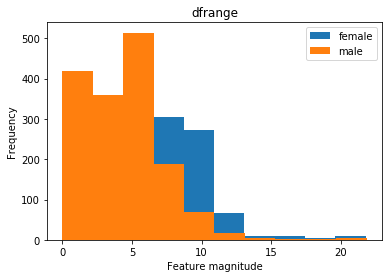

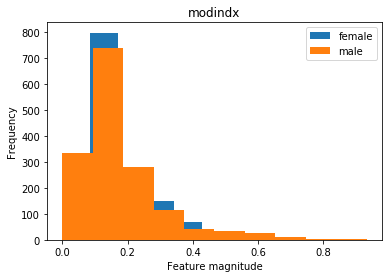

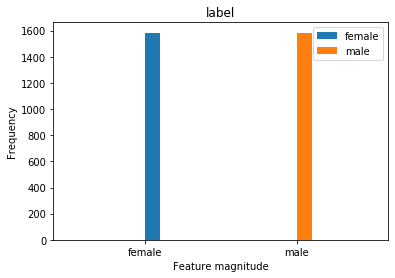

In [175]:
#visualising the data
for col in dataset.columns:
    plt.hist(dataset.loc[dataset['label'] == 'female', col],label ="female")
    plt.hist(dataset.loc[dataset['label'] == 'male', col],label="male")
    plt.title(col)
    plt.xlabel("Feature magnitude")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

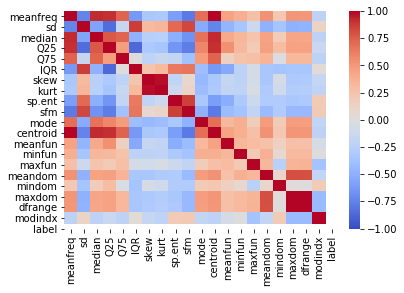

In [176]:
#heatmap
corr=dataset.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap="coolwarm",xticklabels=dataset.columns,
               yticklabels=dataset.columns)

In [178]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

#splitting the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =100)

In [179]:
#Univariate ROC-AUC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
roc_values = []
for feature in X_train.columns:
    clf = LogisticRegression(random_state = 0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [180]:
roc_values.sort_values(ascending=False)

meanfun     0.984535
IQR         0.865755
Q25         0.853485
sd          0.798523
sp.ent      0.773346
sfm         0.717986
centroid    0.694610
meanfreq    0.694610
median      0.641166
maxdom      0.623816
dfrange     0.620895
maxfun      0.594220
meandom     0.582602
Q75         0.566282
mode        0.565535
mindom      0.561007
minfun      0.536044
modindx     0.506414
kurt        0.388793
skew        0.358381
dtype: float64

Text(0.5, 1.0, 'Univariate ROC-AUC')

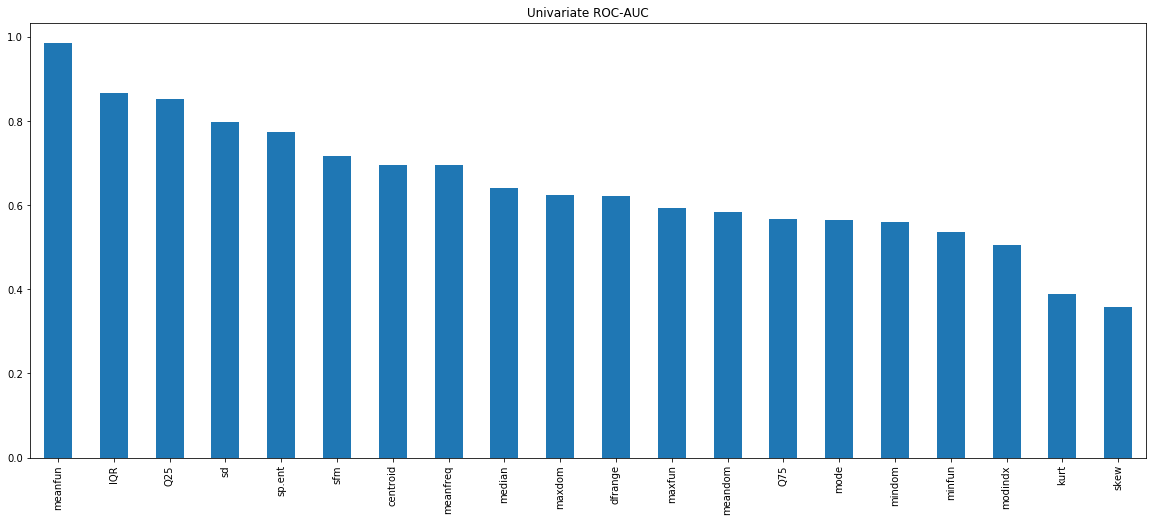

In [181]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title('Univariate ROC-AUC')

In [182]:
dataset = dataset.drop(['kurt','skew'],axis='columns')

In [183]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [184]:
cols = ['meanfreq','sd','median','Q25','Q75','IQR','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']
cols

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

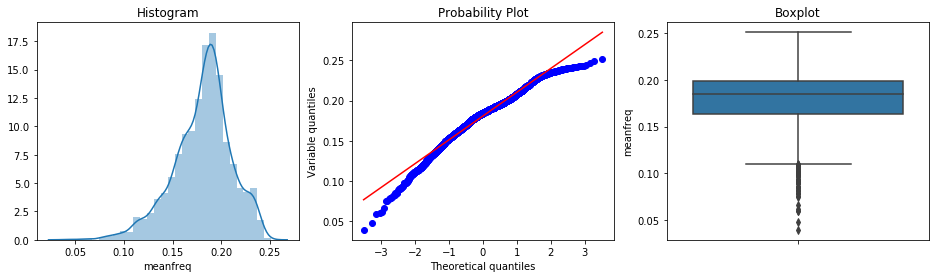

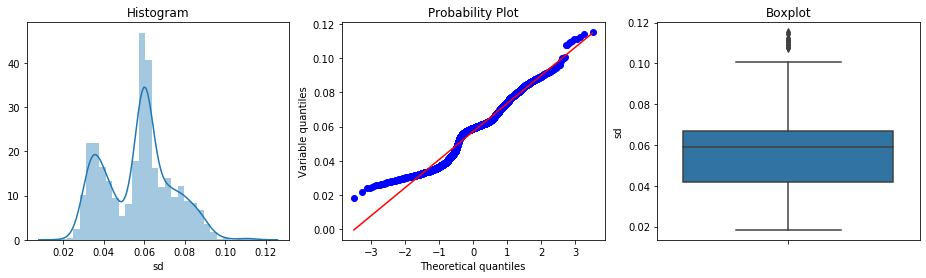

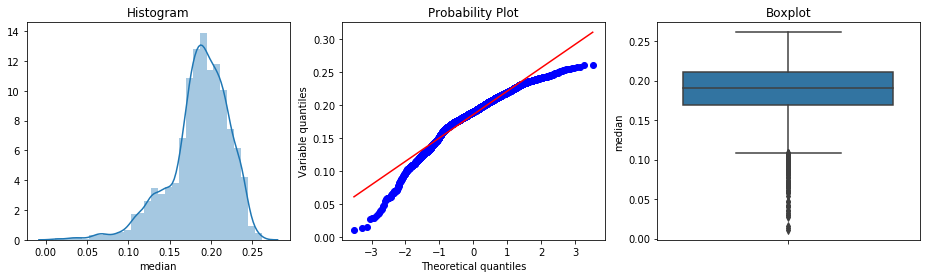

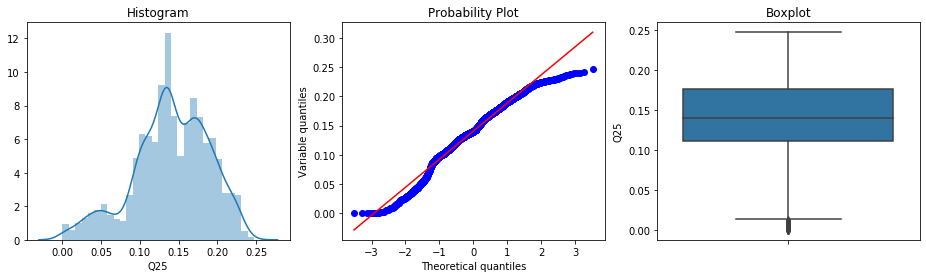

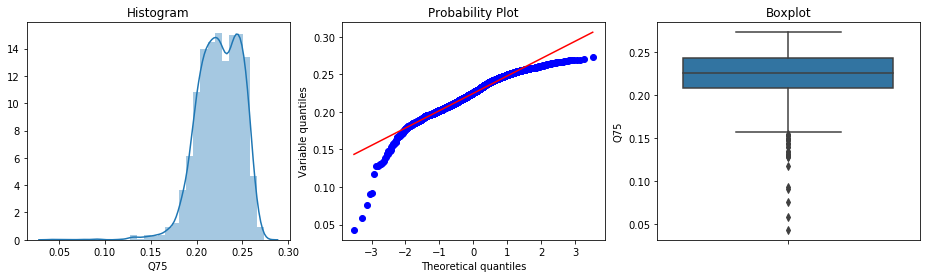

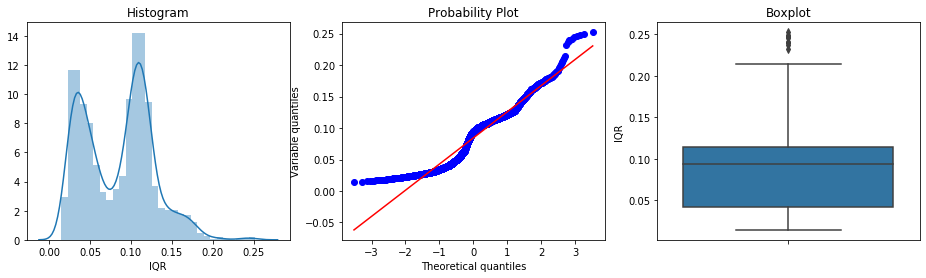

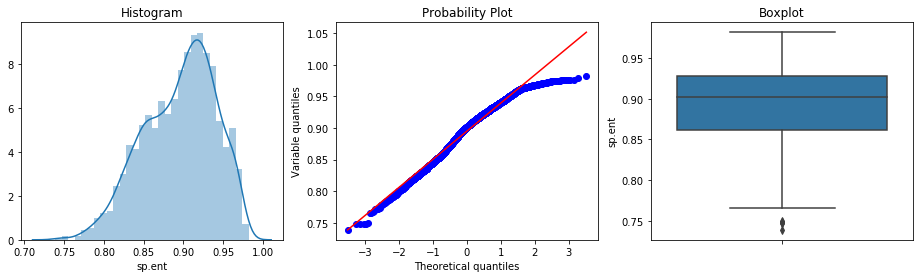

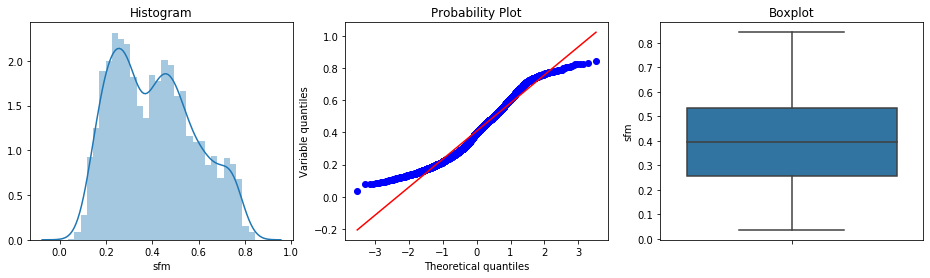

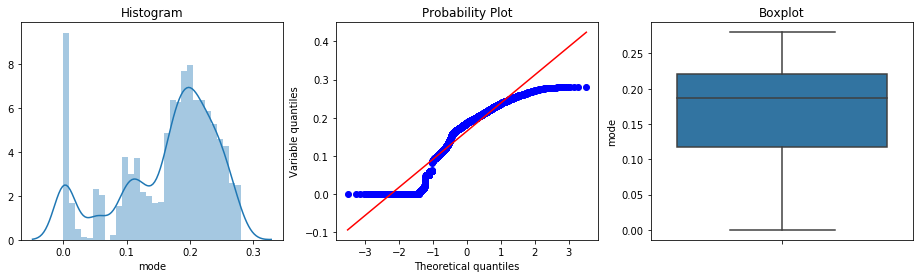

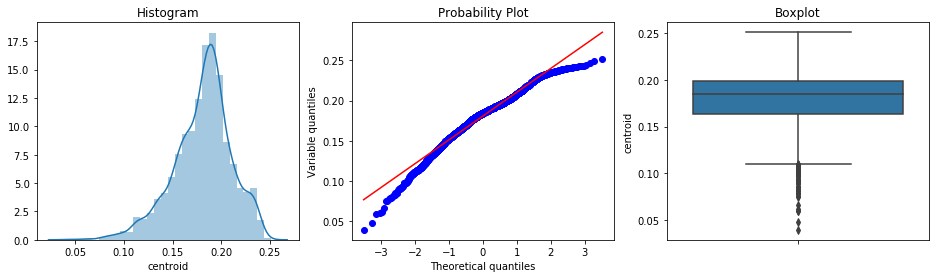

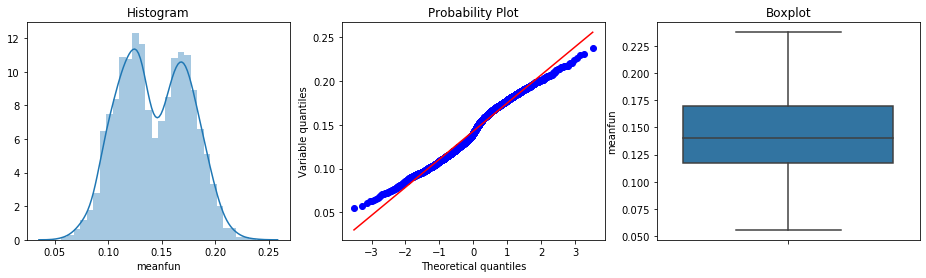

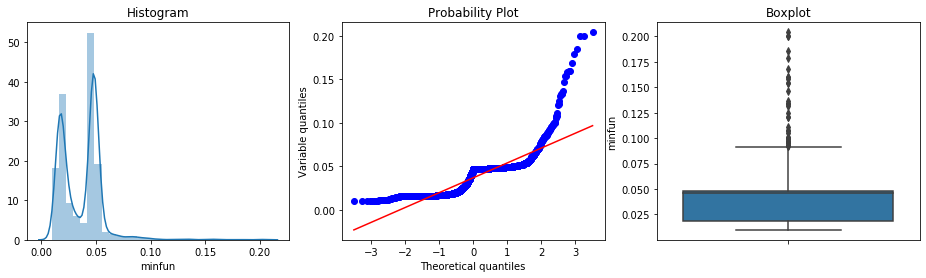

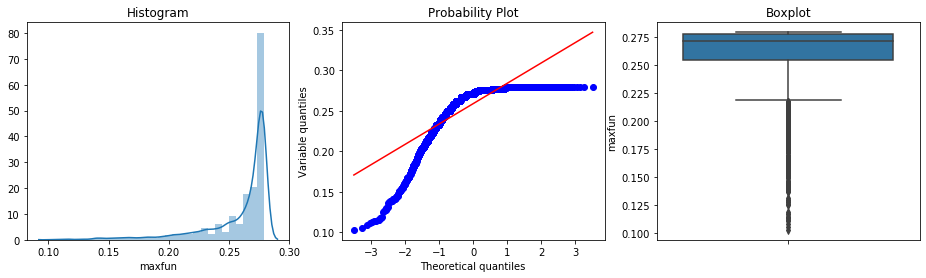

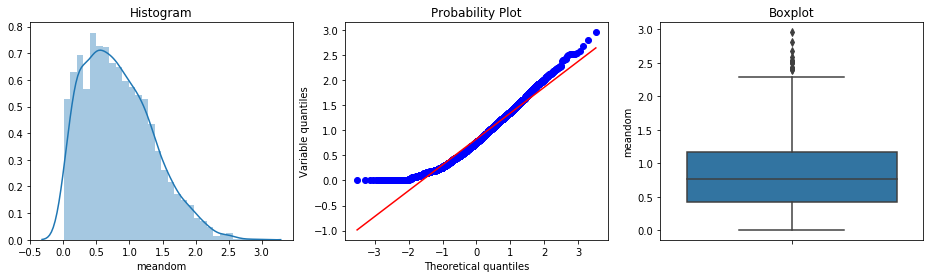

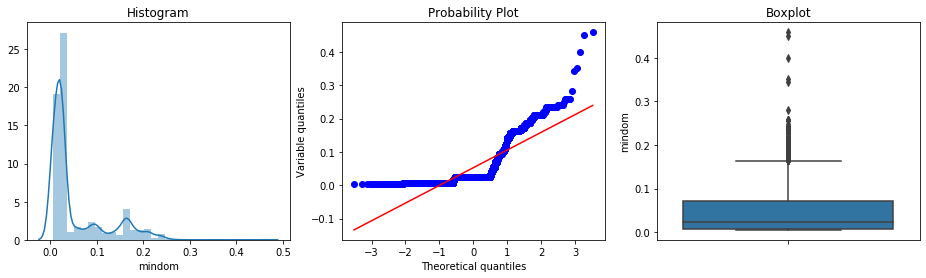

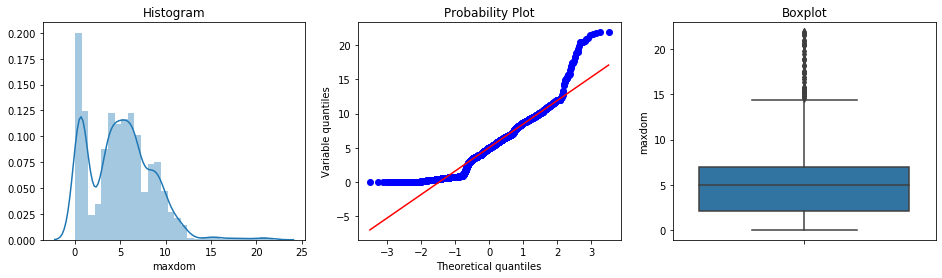

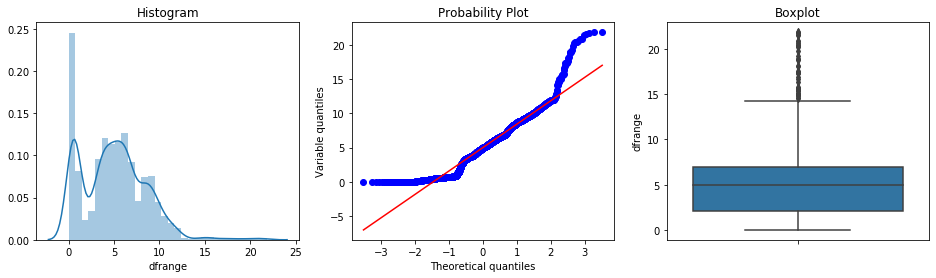

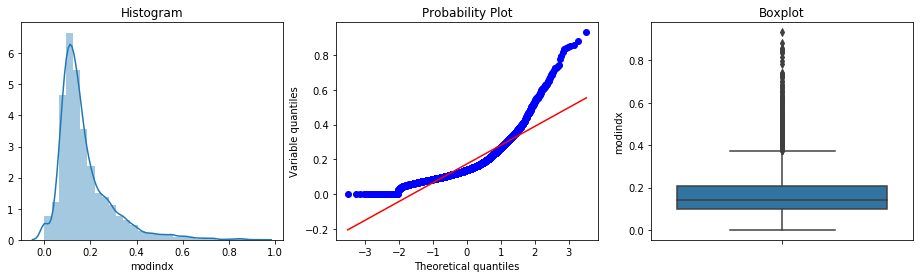

In [185]:
for val in cols:
    diagnostic_plots(dataset, val)

In [186]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [187]:
meanfreq_upper_limit, meanfreq_lower_limit = find_normal_boundaries(dataset, 'meanfreq', 3)
meanfreq_upper_limit, meanfreq_lower_limit

(0.27066012406581685, 0.09115309667586707)

In [189]:
sd_upper_limit, sd_lower_limit = find_normal_boundaries(dataset, 'sd', 3)
sd_upper_limit, sd_lower_limit

(0.1070827061515621, 0.007169223662286485)

In [190]:
median_upper_limit, median_lower_limit = find_normal_boundaries(dataset, 'median', 3)
median_upper_limit, median_lower_limit

(0.2947011154182848, 0.0765402375288534)

In [191]:
Q25_upper_limit, Q25_lower_limit = find_normal_boundaries(dataset, 'Q25', 3)
Q25_upper_limit, Q25_lower_limit

(0.28649473806185344, -0.005583557091216107)

In [192]:
Q75_upper_limit, Q75_lower_limit = find_normal_boundaries(dataset, 'Q75', 3)
Q75_upper_limit, Q75_lower_limit

(0.2956827962619879, 0.15384712656795682)

In [193]:
IQR_upper_limit, IQR_lower_limit = find_normal_boundaries(dataset, 'IQR', 3)
IQR_upper_limit, IQR_lower_limit

(0.21265853407685553, -0.044039792217549126)

In [194]:
sp_upper_limit, sp_lower_limit = find_normal_boundaries(dataset, 'sp.ent', 3)
sp_upper_limit, sp_lower_limit

(1.0300656195197808, 0.7601885091451228)

In [195]:
centroid_upper_limit, centroid_lower_limit = find_normal_boundaries(dataset, 'centroid', 3)
centroid_upper_limit, centroid_lower_limit

(0.27066012406581685, 0.09115309667586707)

In [196]:
minfun_upper_limit, minfun_lower_limit = find_normal_boundaries(dataset, 'minfun', 3)
minfun_upper_limit, minfun_lower_limit

(0.09446166477938694, -0.02085804810507158)

In [197]:
maxfun_upper_limit, maxfun_lower_limit = find_normal_boundaries(dataset, 'maxfun', 3)
maxfun_upper_limit, maxfun_lower_limit

(0.3490741740399286, 0.1686103174991956)

In [198]:
meandom_upper_limit, meandom_lower_limit = find_normal_boundaries(dataset, 'meandom', 3)
meandom_upper_limit, meandom_lower_limit

(2.4048260596464472, -0.7464041402354974)

In [199]:
mindom_upper_limit, mindom_lower_limit = find_normal_boundaries(dataset, 'mindom', 3)
mindom_upper_limit, mindom_lower_limit

(0.24254547977139557, -0.1372513889609474)

In [200]:
maxdom_upper_limit, maxdom_lower_limit = find_normal_boundaries(dataset, 'maxdom', 3)
maxdom_upper_limit, maxdom_lower_limit

(15.610746572274685, -5.516193096846577)

In [201]:
dfrange_upper_limit, dfrange_lower_limit = find_normal_boundaries(dataset, 'dfrange', 3)
dfrange_upper_limit, dfrange_lower_limit

(15.554747052209073, -5.5654876675914124)

In [202]:
modindx_upper_limit, modindx_lower_limit = find_normal_boundaries(dataset, 'modindx', 3)
modindx_upper_limit, modindx_lower_limit

(0.5321146743830102, -0.18461166208487576)

In [203]:
dataset['meanfreq']= np.where(dataset['meanfreq'] > meanfreq_upper_limit, meanfreq_upper_limit,
                       np.where(dataset['meanfreq'] < meanfreq_lower_limit, meanfreq_lower_limit, dataset['meanfreq']))

In [204]:
dataset['sd']= np.where(dataset['sd'] > sd_upper_limit, sd_upper_limit,
                       np.where(dataset['sd'] < sd_lower_limit, sd_lower_limit, dataset['sd']))

In [205]:
dataset['median']= np.where(dataset['median'] > median_upper_limit, median_upper_limit,
                       np.where(dataset['median'] < median_lower_limit, median_lower_limit, dataset['median']))

In [206]:
dataset['Q25']= np.where(dataset['Q25'] > Q25_upper_limit, Q25_upper_limit,
                       np.where(dataset['Q25'] < Q25_lower_limit, Q25_lower_limit, dataset['Q25']))

In [207]:
dataset['Q75']= np.where(dataset['Q75'] > Q75_upper_limit, Q75_upper_limit,
                       np.where(dataset['Q75'] < Q75_lower_limit, Q75_lower_limit, dataset['Q75']))

In [208]:
dataset['IQR']= np.where(dataset['IQR'] > IQR_upper_limit, IQR_upper_limit,
                       np.where(dataset['IQR'] < IQR_lower_limit, IQR_lower_limit, dataset['IQR']))

In [209]:
dataset['sp.ent']= np.where(dataset['sp.ent'] > sp_upper_limit, sp_upper_limit,
                       np.where(dataset['sp.ent'] < sp_lower_limit, sp_lower_limit, dataset['sp.ent']))

In [210]:
dataset['centroid']= np.where(dataset['centroid'] > centroid_upper_limit, centroid_upper_limit,
                       np.where(dataset['centroid'] < centroid_lower_limit, centroid_lower_limit, dataset['centroid']))

In [211]:
dataset['minfun']= np.where(dataset['minfun'] > minfun_upper_limit, minfun_upper_limit,
                       np.where(dataset['minfun'] < minfun_lower_limit, minfun_lower_limit, dataset['minfun']))

In [212]:
dataset['maxfun']= np.where(dataset['maxfun'] > maxfun_upper_limit, maxfun_upper_limit,
                       np.where(dataset['maxfun'] < maxfun_lower_limit, maxfun_lower_limit, dataset['maxfun']))

In [213]:
dataset['meandom']= np.where(dataset['meandom'] > meandom_upper_limit, meandom_upper_limit,
                       np.where(dataset['meandom'] < meandom_lower_limit, meandom_lower_limit, dataset['meandom']))

In [214]:
dataset['mindom']= np.where(dataset['mindom'] > mindom_upper_limit, mindom_upper_limit,
                       np.where(dataset['mindom'] < mindom_lower_limit, mindom_lower_limit, dataset['mindom']))

In [215]:
dataset['maxdom']= np.where(dataset['maxdom'] > maxdom_upper_limit, maxdom_upper_limit,
                       np.where(dataset['maxdom'] < maxdom_lower_limit, maxdom_lower_limit, dataset['maxdom']))

In [216]:
dataset['dfrange']= np.where(dataset['dfrange'] > dfrange_upper_limit, dfrange_upper_limit,
                       np.where(dataset['dfrange'] < dfrange_lower_limit, dfrange_lower_limit, dataset['dfrange']))

In [217]:
dataset['modindx']= np.where(dataset['modindx'] > modindx_upper_limit, modindx_upper_limit,
                       np.where(dataset['modindx'] < modindx_lower_limit, modindx_lower_limit, dataset['modindx']))

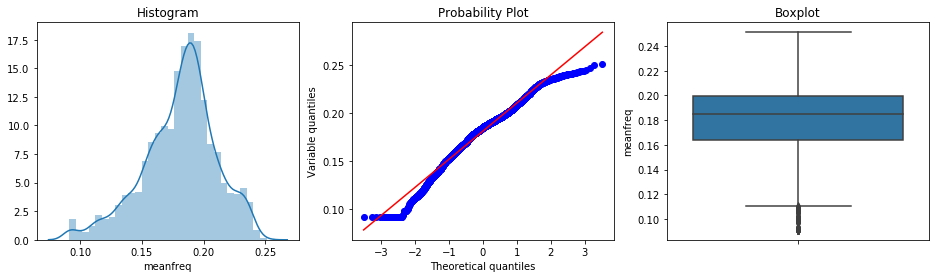

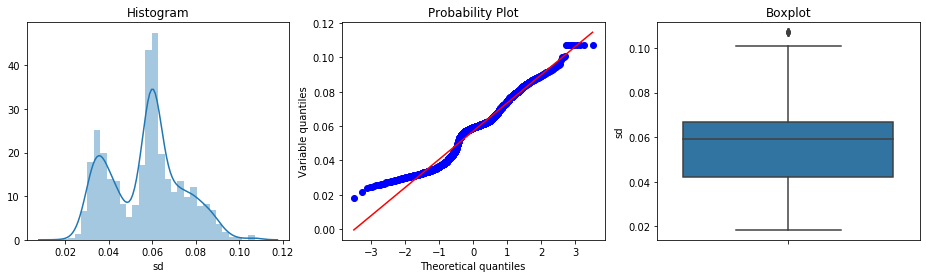

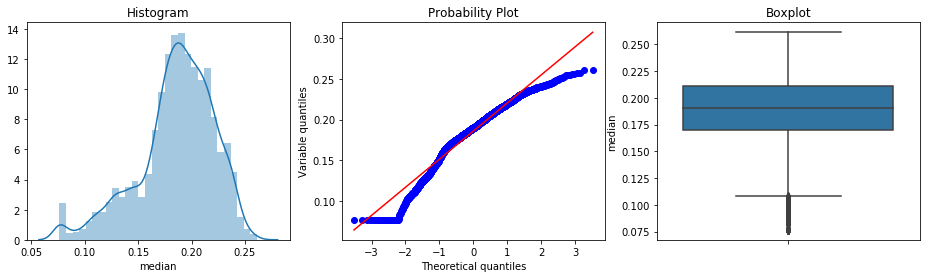

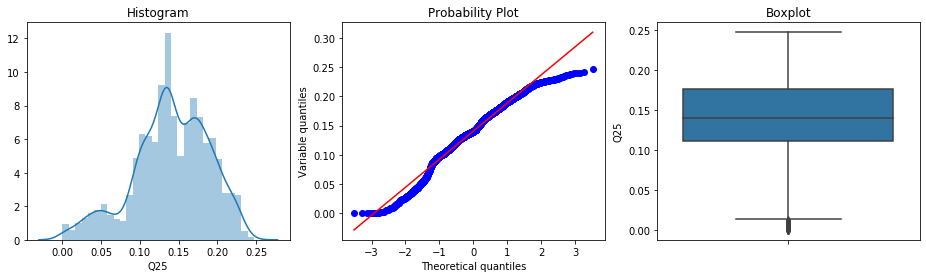

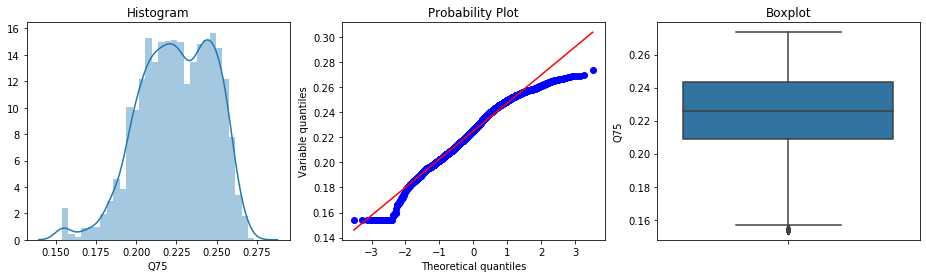

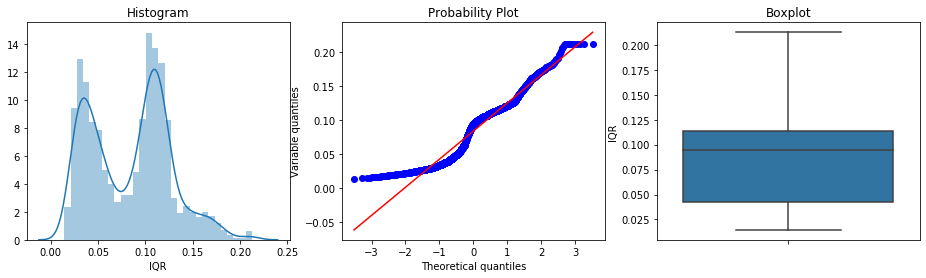

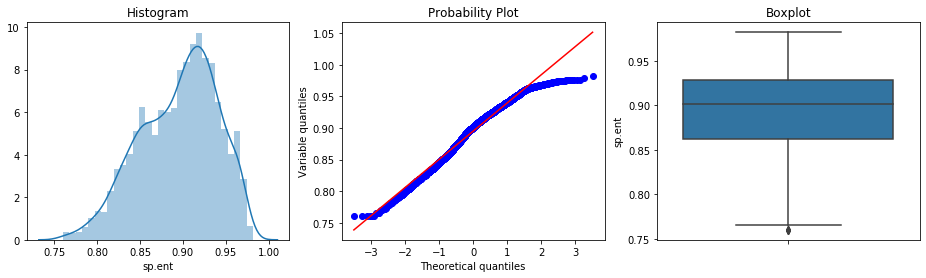

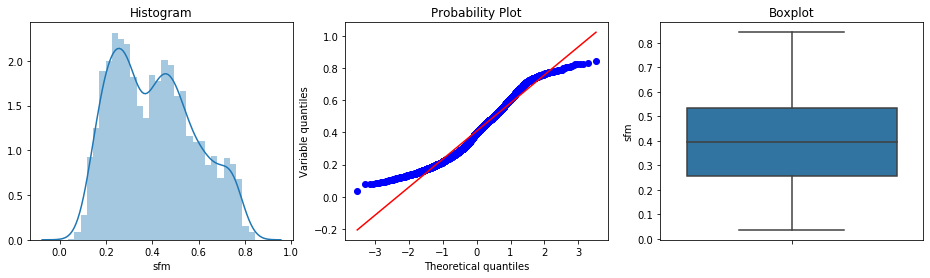

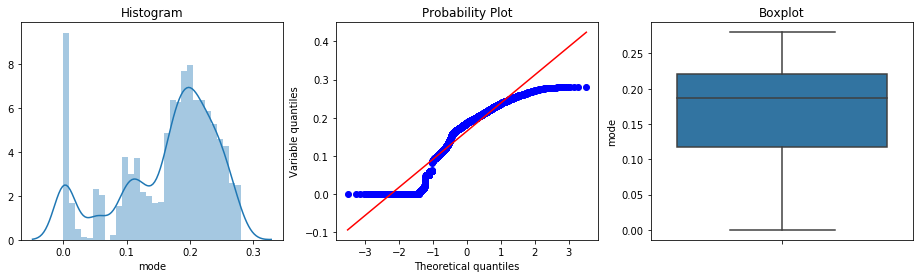

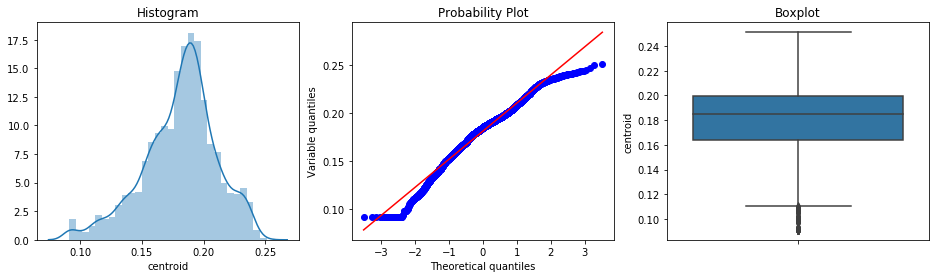

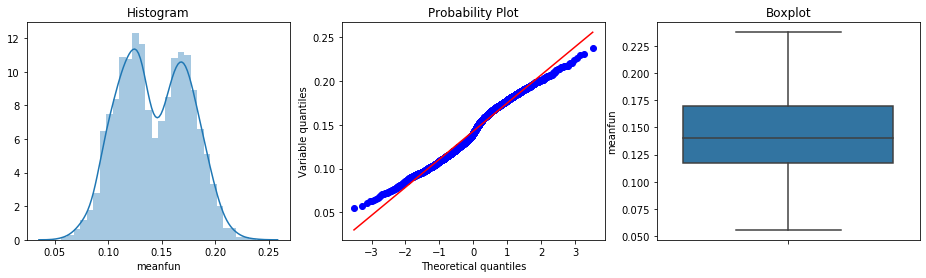

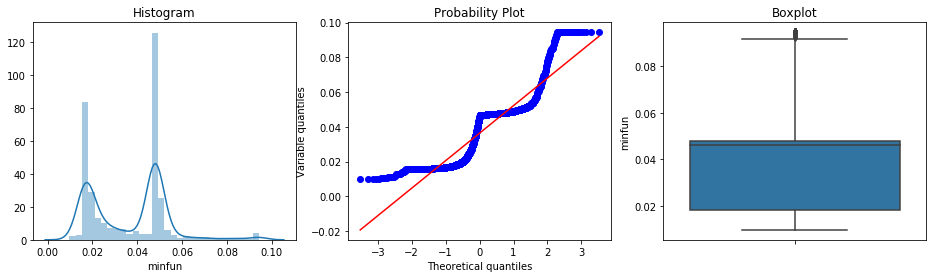

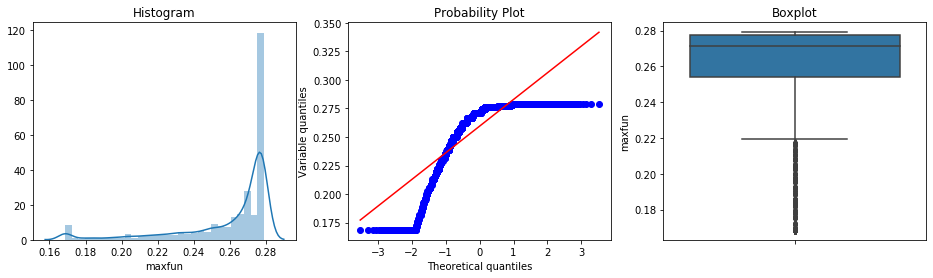

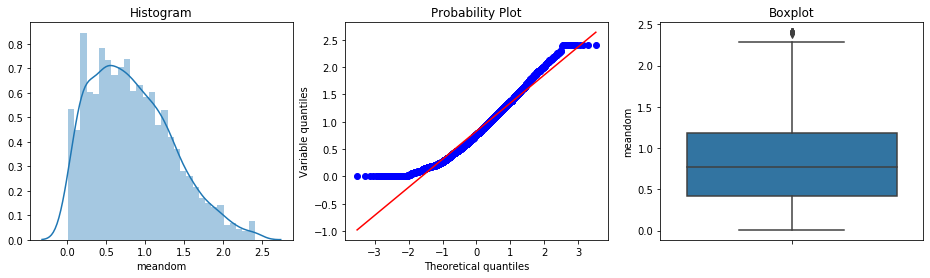

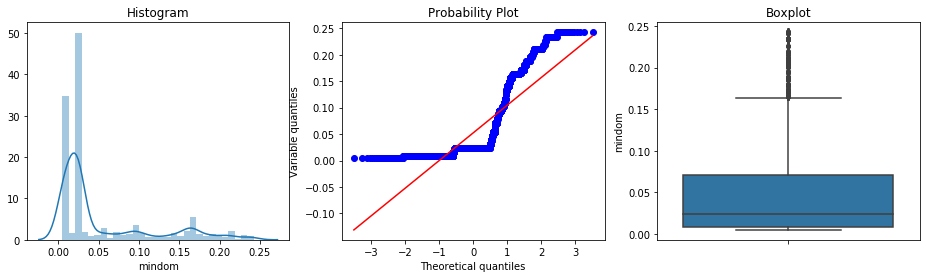

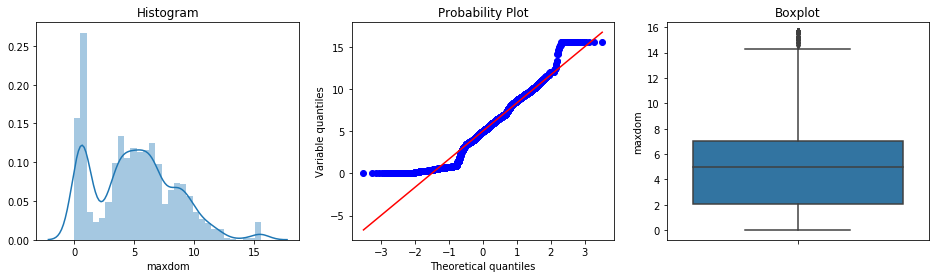

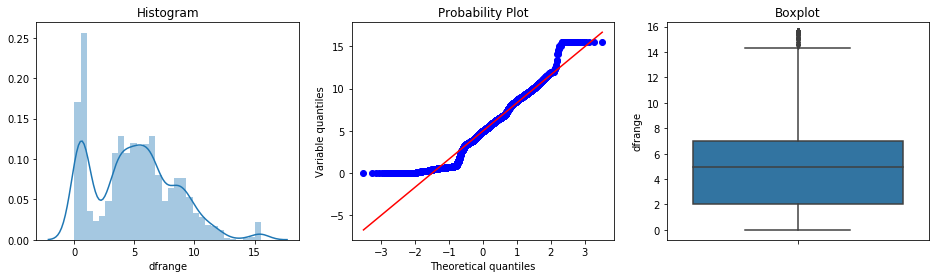

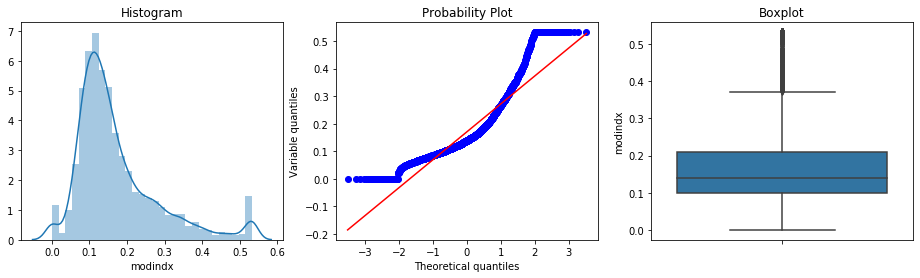

In [218]:
for val in cols:
    diagnostic_plots(dataset, val)

In [219]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state =0)

In [220]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [221]:
                                        #LOGISTIC REGRESSION
#training model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,penalty='l2',n_jobs = 8,solver='saga')
classifier.fit(X_train,y_train)

#training model
y_pred = classifier.predict(X_test).reshape(-1,1)
y_pred1 = classifier.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[439  18]
 [  4 490]]


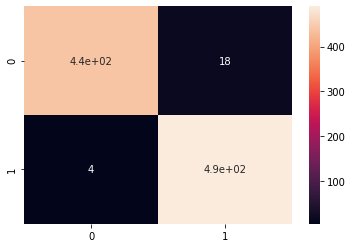

In [222]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))
cm=confusion_matrix(y_test, classifier.predict(X_test))
CM=pd.DataFrame(cm)
sns.heatmap(CM, annot=True)
plt.show()

In [223]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of train set : " + str(jaccard_similarity_score(y_train,y_pred1)))
print('Accuracy of test set : '+str(jaccard_similarity_score(y_test,y_pred)))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn import metrics
y_lprob=classifier.predict_proba(X_test)[:,1]
print('Roc-Auc score:' +str(metrics.roc_auc_score(y_test,y_lprob)))

Accuracy of train set : 0.9711321605773567
Accuracy of test set : 0.9768664563617245
              precision    recall  f1-score   support

      female       0.99      0.96      0.98       457
        male       0.96      0.99      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

Roc-Auc score:0.9965139662824795


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [225]:
                                            #DECISION TREE
#training model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train, y_train)

#training model
y_pred2 = tree.predict(X_test).reshape(-1,1)
y_pred3 = tree.predict(X_train)

[[439  18]
 [ 16 478]]


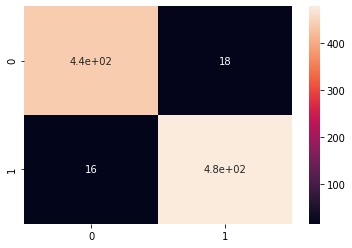

In [226]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred2, labels=None, sample_weight=None, normalize=None))
cm=confusion_matrix(y_test, tree.predict(X_test))
CM=pd.DataFrame(cm)
sns.heatmap(CM, annot=True)
plt.show()

In [227]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of train set : " + str(jaccard_similarity_score(y_train,y_pred3)))
print('Accuracy of test set : '+str(jaccard_similarity_score(y_test,y_pred2)))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))
from sklearn import metrics
y_lprob=tree.predict_proba(X_test)[:,1]
print('Roc-Auc score:' +str(metrics.roc_auc_score(y_test,y_lprob)))

Accuracy of train set : 0.9801533603969328
Accuracy of test set : 0.964248159831756
              precision    recall  f1-score   support

      female       0.96      0.96      0.96       457
        male       0.96      0.97      0.97       494

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951

Roc-Auc score:0.9731371645744558


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [228]:
                                                #RANDOM FOREST
#training model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

#training model
y_pred4 = forest.predict(X_test).reshape(-1,1)
y_pred5 = forest.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[[445  12]
 [ 12 482]]


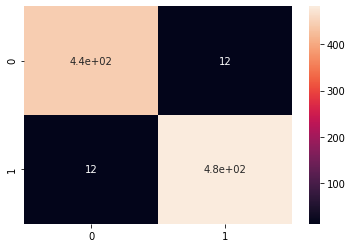

In [229]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred4, labels=None, sample_weight=None, normalize=None))
cm=confusion_matrix(y_test, forest.predict(X_test))
CM=pd.DataFrame(cm)
sns.heatmap(CM, annot=True)
plt.show()

In [230]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of train set : " + str(jaccard_similarity_score(y_train,y_pred5)))
print('Accuracy of test set : '+str(jaccard_similarity_score(y_test,y_pred4)))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))
from sklearn import metrics
y_lprob=forest.predict_proba(X_test)[:,1]
print('Roc-Auc score:' +str(metrics.roc_auc_score(y_test,y_lprob)))

Accuracy of train set : 0.9963915200721696
Accuracy of test set : 0.9747634069400631
              precision    recall  f1-score   support

      female       0.97      0.97      0.97       457
        male       0.98      0.98      0.98       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

Roc-Auc score:0.9944520238485457


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [231]:
                                                        #SVM
#training model
from sklearn.svm import SVC
svm = SVC(kernel='rbf',random_state=0,probability=True)
svm.fit(X_train,y_train)

#training model
y_pred6 = svm.predict(X_test).reshape(-1,1)
y_pred7 = svm.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[452   5]
 [  5 489]]


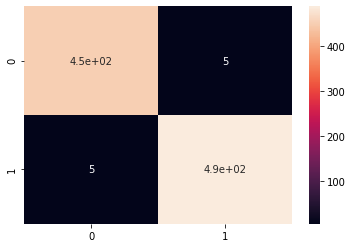

In [232]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred6, labels=None, sample_weight=None, normalize=None))
cm=confusion_matrix(y_test, svm.predict(X_test))
CM=pd.DataFrame(cm)
sns.heatmap(CM, annot=True)
plt.show()

In [233]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of train set : " + str(jaccard_similarity_score(y_train,y_pred7)))
print('Accuracy of test set : '+str(jaccard_similarity_score(y_test,y_pred6)))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))
from sklearn import metrics
y_lprob=svm.predict_proba(X_test)[:,1]
print('Roc-Auc score:' +str(metrics.roc_auc_score(y_test,y_lprob)))

Accuracy of train set : 0.9837618403247632
Accuracy of test set : 0.9894847528916929
              precision    recall  f1-score   support

      female       0.99      0.99      0.99       457
        male       0.99      0.99      0.99       494

    accuracy                           0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951

Roc-Auc score:0.9984319492553974


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
